In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [39]:
%reload_ext autoreload

In [2]:
import nolearn.lasagne.visualize 

In [3]:
NETS = []
NETS.append('../nets/IP_FULL.p') # image + prob
NETS.append('../nets/IPLB_FULL.p') # image + large border
NETS.append('../nets/IPM_FULL.p') # image + prob + binary
NETS.append('../nets/IPMB_FULL.p') # image + prob + binary + border
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [4]:
net.train_history_[-52]

{'dur': 88.82897090911865,
 'epoch': 261,
 'train_loss': 0.10699970212163648,
 'train_loss_best': False,
 'valid_accuracy': 0.96897836112096492,
 'valid_loss': 0.084532429298247877,
 'valid_loss_best': True}

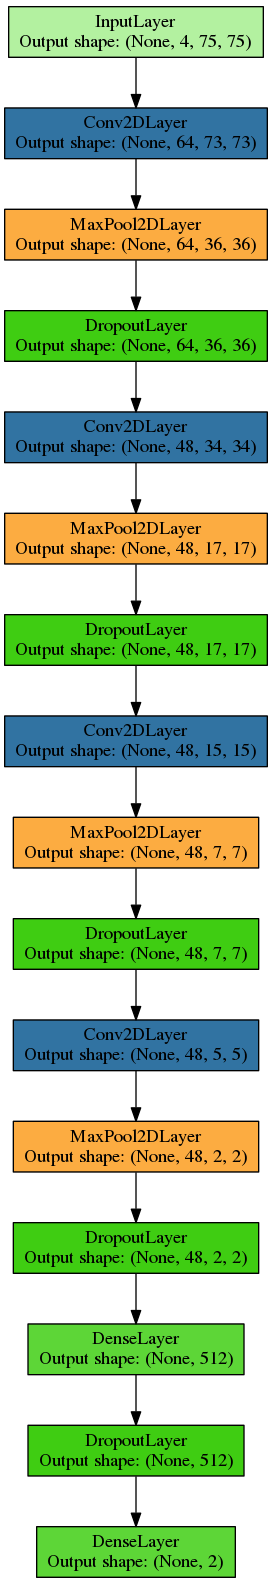

In [5]:
nolearn.lasagne.visualize.draw_to_notebook(net)

In [6]:
X_test, y_test = gp.Patch.load_rgba_test_only('ipmlb')

Loaded /home/d/patches//ipmlb/ in 0.000455141067505 seconds.


In [7]:
len(X_test)

17560

In [8]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      8780
          1       0.92      0.96      0.94      8780

avg / total       0.94      0.94      0.94     17560



In [9]:
test_acc = net.score(X_test, y_test)
acc_score = accuracy_score(y_test, test_prediction)
print 'Test Accuracy:', test_acc
print 'Accuracy Score:', acc_score

Test Accuracy: 0.940432801822
Accuracy Score: 0.940432801822


<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

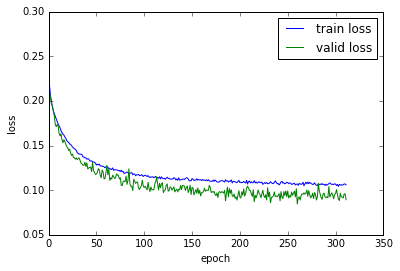

In [10]:
plot_loss(net)

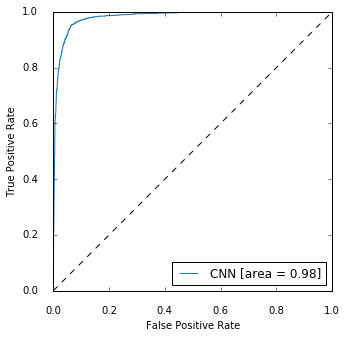

In [11]:
# ROC/AUC
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)
data = {}
data['CNN'] = (fpr, tpr, roc_auc)
gp.Legacy.plot_roc(data)

In [12]:
net.uuid = 'IPMLB'

In [17]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


In [20]:
gp.Util.threshold(rhoana, 583).max()

0.0

In [47]:
gp.Stats.run_dojo_xp(net)

a
Loading merge errors from file..
10  merge errors found.
Loading dojo bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.0603675123583
   Median VI improvement 0.0546680054853

Correcting merge errors with p < .05
fixing 1.25392163319e-09
fixing 0.0360888727009
fixing 0.036937456578
fixing 0.00606872793287
fixing 1.77100162091e-06
fixing 0.00174562365282
   Mean VI improvement 0.0056644086815
   Median VI improvement 0.0
Correcting split errors with p > .95
30 minutes done bigM_max= 0.258135043085
   Mean VI improvement -2.68395248883
   Median VI improvement -2.72263508764

Loading merge errors and split errors (simulated user) from file..
   Mean VI improvement 0.128358584712
   Median VI improvement 0.0927095314219


In [45]:
gp.Stats.run_cylinder_xp(net)

Original median VI 0.379410649496
Loading merge errors from file..
151  merge errors found.
Creating cylinder bigM..


KeyboardInterrupt: 

In [29]:
image.shape

(10, 474, 474)

In [36]:
# load dojo data
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()



In [40]:
input_image[0].max()

225

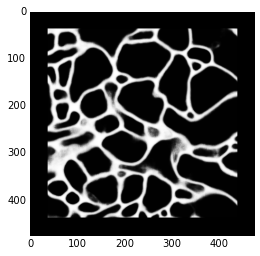

In [38]:
imshow(input_prob[2], cmap='gray')

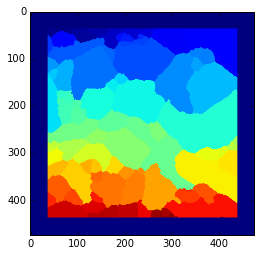

In [41]:
imshow(input_rhoana[0])

In [53]:
import numpy as np
def seg_to_color(slice):
	colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
	colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
	colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
	colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
	return colors

i_r = input_image[0]
rrr = np.zeros((i_r.shape[0], i_r.shape[1], 3), dtype=np.uint8)
for j in range(rrr.shape[0]):
    for i in range(rrr.shape[1]):
        rrr[j,i] = (i_r[j,i], i_r[j,i], i_r[j,i])
    
rrr[input_prob[0] > 220 ] = (0,255,0)

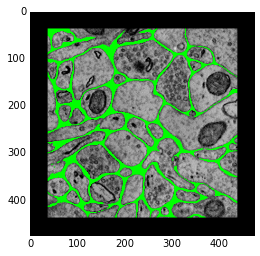

In [57]:
plt.figure()
imshow(rrr)

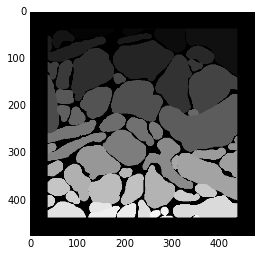

In [55]:
imshow(input_gold[0], cmap='gray')

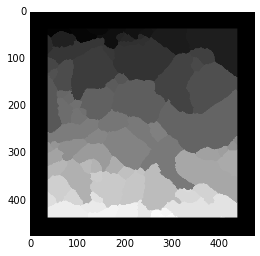

In [56]:
imshow(input_rhoana[0], cmap='gray')

In [62]:
original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)
original_adapted_rand = gp.metrics.adapted_rand(input_rhoana, input_gold)

KeyboardInterrupt: 

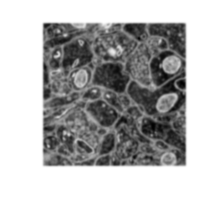

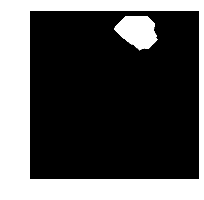

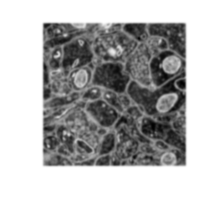

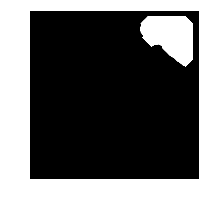

In [64]:
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana)


In [66]:
first_rand = gp.metrics.adapted_rand(input_rhoana[0], input_gold[0])

In [78]:
net.uuid = 'IPMLB'

In [80]:
M = gp.Legacy.create_bigM_without_mask(net, input_image[0:1], input_prob[0:1], input_rhoana[0:1], verbose=False)

In [85]:
newM, new_rhoana, fixes, new_vi_s = gp.Legacy.splits_global_from_M_automatic(net, M, input_image[0:1], input_prob[0:1], 
                                                                             input_rhoana[0:1], input_gold[0:1], sureness_threshold=.95)

In [87]:
fixes

[(1, 0.99998939037322998),
 (1, 0.99904423952102661),
 (0, 0.99768221378326416),
 (1, 0.99105918407440186),
 (1, 0.98917317390441895),
 (1, 0.97869938611984253),
 (0, 0.97463154792785645),
 (1, 0.96067178249359131),
 (1, 0.96036547422409058)]

In [88]:
gp.metrics.adapted_rand(new_rhoana[0], input_gold[0])

0.067449536773076524

In [89]:
first_rand

0.073737703314086689